In [21]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createData, createData2
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[0.1007 0.7356 0.    ]
 [1.7835 1.4578 1.    ]
 [0.6353 0.0916 0.    ]
 [1.8446 1.5789 1.    ]
 [0.9357 0.3363 0.    ]
 [0.0662 0.704  0.    ]
 [1.7173 1.9487 1.    ]
 [1.4034 0.8495 0.    ]
 [1.4372 1.1699 1.    ]
 [1.5929 0.2171 0.    ]]


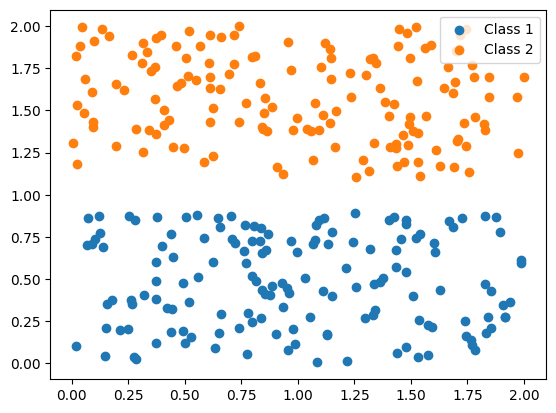

In [22]:
data = createData(150, 150)
print("Data: [x, y, label]\n", data[0:10])

# divide into classes
class1 = data[np.where(data[:,2] == 0)]
class2 = data[np.where(data[:,2] == 1)]

plt.scatter(class1[:,0], class1[:,1], label="Class 1")
plt.scatter(class2[:,0], class2[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [23]:
# Other possible network for example:
# nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 4, hidden_units = [5, 5, 5, 5], activation = "sigmoid", output_activation = "linear")
nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [10, 10], activation = "relu", output_activation = "sigmoid")
weights = nn.weights()
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

(10, 2)
[[-0.3659  0.0897]
 [ 0.2406  0.5794]
 [ 0.2683 -0.0162]
 [ 0.4143 -0.5051]
 [-0.2724 -0.1512]
 [-0.0183 -0.0715]
 [ 0.2258  0.6919]
 [-0.6874  0.4933]
 [ 0.3632 -0.5475]
 [-0.3156 -0.3852]]
(10, 10)
[[-0.0727  0.0865  0.0998  0.0012  0.2023  0.1851 -0.0727  0.14    0.0412
   0.126 ]
 [ 0.0663  0.1225 -0.0787 -0.0151  0.0716 -0.3013 -0.0011  0.0026 -0.2093
  -0.1987]
 [ 0.1863 -0.1884  0.0719 -0.0879  0.2597 -0.1367 -0.2485  0.0889  0.2915
  -0.1177]
 [-0.2384  0.0106  0.0126  0.2171 -0.045   0.1175  0.0763 -0.2314  0.2312
   0.2477]
 [-0.0089 -0.1424 -0.1628  0.0066 -0.2985 -0.0216 -0.2946  0.2401  0.1194
   0.0882]
 [-0.0051  0.0061 -0.2678 -0.0994  0.2753  0.2892 -0.0551  0.2551 -0.2218
   0.2198]
 [-0.3079 -0.0333  0.0615  0.0868 -0.1739  0.0433 -0.2531  0.2952  0.0037
  -0.2646]
 [ 0.0687  0.2546  0.0492  0.1241  0.265   0.0704 -0.012  -0.0395  0.0807
   0.2555]
 [-0.2795  0.2907 -0.0143  0.0969 -0.1609 -0.1699  0.2167  0.0114 -0.1015
   0.2019]
 [-0.0077 -0.1855  0.1784 -

### Quick forward call

In [24]:
input = class1[0][0:2]
print("Input:", input, "- Label:", class1[0][2])
output = nn.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], 1)
print("BCEloss gives:", loss)

Input: [0.1007 0.7356] - Label: 0.0
Model output: 0.4992719660667168
BCEloss gives: 0.6946043095234723


### Train network on the two classes

In [25]:
nr_epochs = 50
learning_rate = 0.01
running_loss = 0
loss = []

# training loop
for epoch in range(nr_epochs):
    for i in range(data.shape[0]):
        # input
        input = data[i][0:2]
        label = data[i][2]
        
        # forward
        output = nn.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss.append(running_loss / data.shape[0])
    running_loss = 0

In [ ]:
plt.plot(loss)
plt.show()